<style>
.heading {
    text-transform: uppercase;
    position: relative;
    background: #000000
}

.heading h1 {
  text-align: center;
  overflow: hidden;
  color: #fff;
  white-space: nowrap;
  text-overflow: ellipsis;
  font: 30px/32px 'Roboto', sans-serif;
    padding: 100px 0;;
    background: url(../images/border.png) no-repeat center;
}
.heading h1:before,
.heading h1:after {
  content: '';
  width: 100%;
  display: inline-block;
  border-bottom: 1px solid;
  height: 0;
  vertical-align: middle;
}
.heading h1:before {
  margin-left: -100%;
  margin-right: 80px;
}
.heading h1:after {
  margin-left: 80px;
  margin-right: -100%;
}
</style>



<style>
    .heading {
    text-transform: uppercase;
    position: relative;
    background: #000000
}

.heading h1 {
  text-align: center;
  overflow: hidden;
  color: #fff;
  white-space: nowrap;
  text-overflow: ellipsis;
  font: 30px/32px 'Roboto', sans-serif;
    padding: 100px 0;;
    background: url(../images/border.png) no-repeat center;
}
.heading h1:before,
.heading h1:after {
  content: '';
  width: 100%;
  display: inline-block;
  border-bottom: 1px solid;
  height: 0;
  vertical-align: middle;
}
.heading h1:before {
  margin-left: -100%;
  margin-right: 80px;
}
.heading h1:after {
  margin-left: 80px;
  margin-right: -100%;
}
</style>



In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Lecture, affichage et sauvegarde d'une image

1. Afficher l'image 'cameraman.tif' et donner les caractéristiques de cette image. 
Etudier les options de la fonction « cv2.imshow ».

Text(0.5, 1.0, 'cameraman tif image')

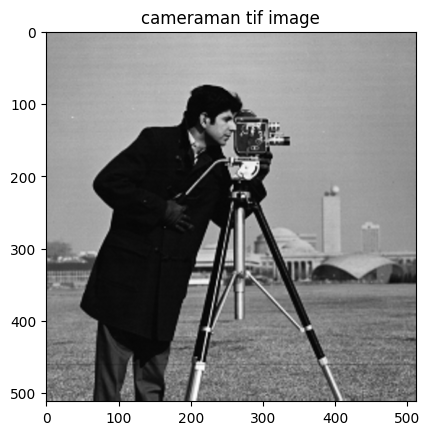

In [2]:
cameraman = cv2.imread('images/cameraman.tif')

# affichage de l'image avec matplotlib
plt.imshow(cameraman)
plt.title("cameraman tif image")

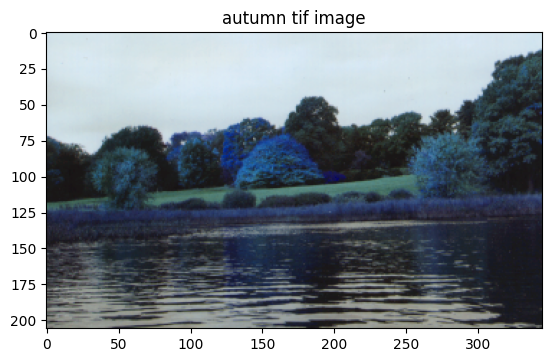

In [3]:
autumn = cv2.imread('images/autumn.tif')
plt.title("autumn tif image")
plt.imshow(autumn)

3. Enregistrer l'image 'cameraman.tiff' sous les formats suivants : JPEG, BMP, PNG, GIF et le format tiff sans compression.

In [6]:
cameraman_ext = ['jpeg', 'bmp', 'png', 'tiff']

for ext in cameraman_ext :
    
    cv2.imwrite('output/cameraman.'+ext, cameraman)

# On a besoin de PIL pour les fichier gif
Image.fromarray(cameraman).save('output/cameraman.gif')

 Ouvrir et afficher ensuite chacune de ces
images, observer leurs différences et comparer les avec l'image d'origine. 

(-0.5, 511.5, 511.5, -0.5)

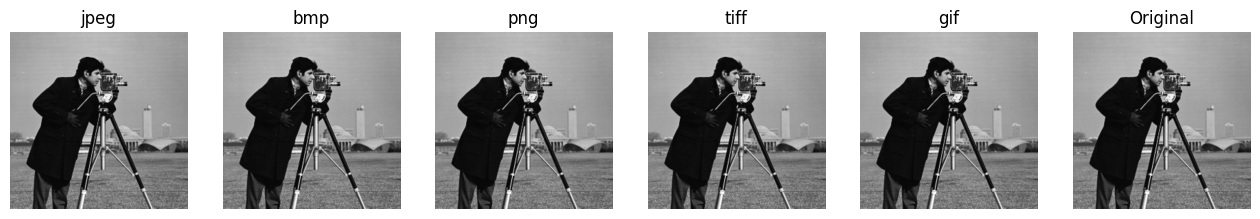

In [7]:
fig, ax = plt.subplots(1, 6, figsize=(16, 4))

# show the images
for i, ext in enumerate(cameraman_ext):
    
    ax[i].imshow(cv2.imread('output/cameraman.'+ext))
    ax[i].set_title(ext)
    ax[i].axis('off')

# show the gif   
ax[4].imshow(Image.open('output/cameraman.gif'))
ax[4].set_title('gif')
ax[4].axis('off')

# show the original image
ax[5].imshow(cameraman)
ax[5].set_title('Original')
ax[5].axis('off')


Mesurer ces
différences avec I'image d'origine en calculant l'erreur quadratique moyenne.

In [8]:
def mse(img_1,img_2):
    return np.mean((img_1 - img_2) ** 2)

$$mse=\frac{1}{m*n}\Sigma_{i=0}^{m-1}\Sigma_{j=0}^{n-1}[I(i,j)-K(i,j)]^2$$

In [10]:
cameraman_mse = {}

for ext in cameraman_ext:
        img = cv2.imread('output/cameraman.'+ext)
        cameraman_mse[ext] = mse(cameraman, img)


print(cameraman_mse)

{'jpeg': 0.78070068359375, 'bmp': 0.0, 'png': 0.0, 'tiff': 0.0}


4. Enregistrer l'image 'cameraman.tif' au format JPEG avec différents niveaux de
compression (mettre le flag 'cv2.IMWRITE_JPEG_Quality' O, 25, 50, 75 et 100).
Ouvrir et afficher ensuite chacune de ces images, observer leurs différences en taille et en qualité et conpparer les avec l'image d'origine. Mesurer ces différences avec l'image d'origine en calculant l'erreur quadratique moyenne.

In [11]:
cameraman_quality = [0,25,50,75,100]

for quality in cameraman_quality:
    cv2.imwrite('output/cameraman_'+str(quality)+'.jpg', cameraman, [int(cv2.IMWRITE_JPEG_QUALITY), quality])


(-0.5, 511.5, 511.5, -0.5)

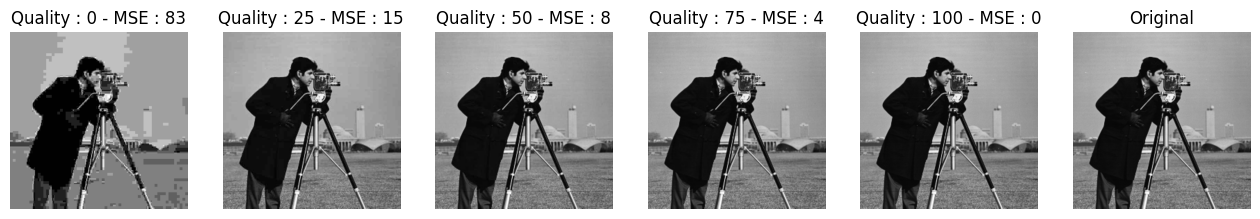

In [13]:
fig, ax = plt.subplots(1, 6, figsize=(16, 4))

# show the images
for i, quality in enumerate(cameraman_quality):

    cameraman_quality_gray = cv2.imread(
        'output/cameraman_'+str(quality)+'.jpg')
    ax[i].imshow(cameraman_quality_gray, cmap='gray')

    mse_value = round(mse(cameraman, cameraman_quality_gray))

    ax[i].set_title('Quality : '+str(quality) + ' - MSE : '+str(mse_value))
    ax[i].axis('off')

# show the original image
ax[5].imshow(cameraman, cmap='gray')
ax[5].set_title('Original')
ax[5].axis('off')

5. Lire l'image couleur 'autumn.tif et la convertir en une image en niveaux de gris.

Text(0.5, 1.0, 'autumn gray image')

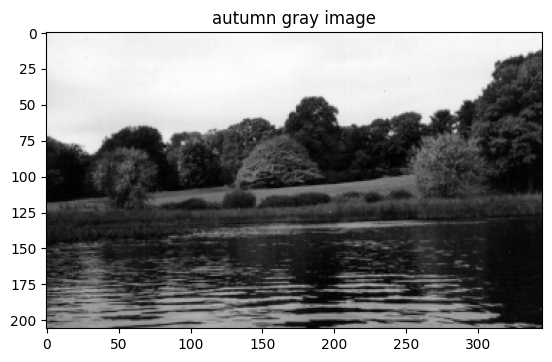

In [14]:
autumn_gray = cv2.cvtColor(autumn, cv2.COLOR_BGR2GRAY)
plt.imshow(autumn_gray, cmap='gray')
plt.title("autumn gray image")

6. Lire l'image couleur 'autumn.tif' et la séparer en sous composantes R, G et B. Que
peut-on observer ?

In [15]:
# read it as R G B
autumn_rgb = cv2.cvtColor(autumn, cv2.COLOR_BGR2RGB)
autumn_rgb.shape

(206, 345, 3)

(-0.5, 344.5, 205.5, -0.5)

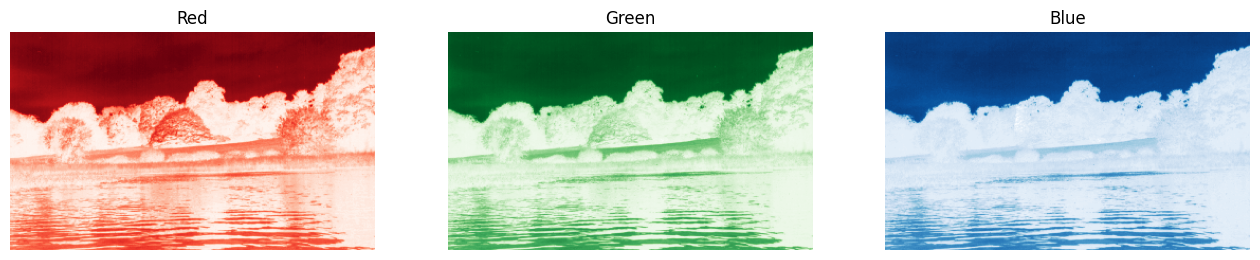

In [16]:
autum_R = autumn_rgb[:,:,0]
autum_G = autumn_rgb[:,:,1]
autum_B = autumn_rgb[:,:,2]

fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].imshow(autum_R, cmap='Reds')
ax[0].set_title('Red')
ax[0].axis('off')

ax[1].imshow(autum_G, cmap='Greens')
ax[1].set_title('Green')
ax[1].axis('off')

ax[2].imshow(autum_B, cmap='Blues')
ax[2].set_title('Blue')
ax[2].axis('off')



On utilisera l'image couleur 'lena_color.tiff'  
Écrire un code en Python en utilisant la bibliothéque OpenCV qui permet de :

1. Chargez l'image Lena et visualisez la dans une fenetre.


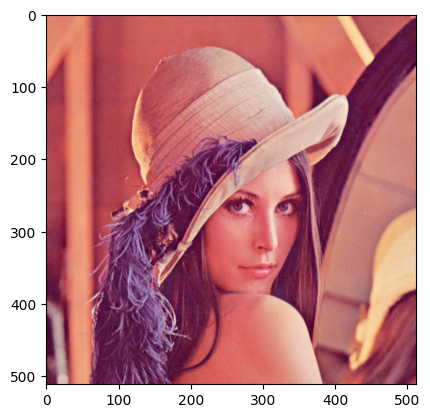

In [20]:
lena = cv2.imread('images/lena_color.tif')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
plt.imshow(lena)

2. Afficher la taille de l'image (nombre de pixels).


In [21]:
pixel_number = lena.shape[0] * lena.shape[1]

image_size = pixel_number * 3 

print("le nombre de pixel est :", pixel_number)
print("la taille de l'image est :", image_size)

le nombre de pixel est : 262144
la taille de l'image est : 786432


3. Visualisez la representation matricielle de cette image.


In [22]:
lena

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

4. Convertir l'image vers l'espace H S V, sauvegarder et afficher la nouvelle image.


(-0.5, 511.5, 511.5, -0.5)

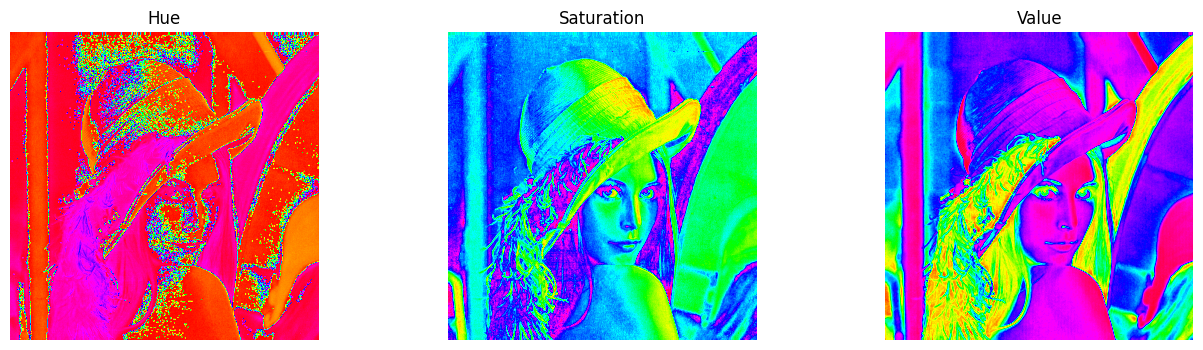

In [23]:
# convert to H S V
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)

fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].imshow(lena_hsv[:,:,0], cmap='hsv')
ax[0].set_title('Hue')
ax[0].axis('off')

ax[1].imshow(lena_hsv[:,:,1], cmap='hsv')
ax[1].set_title('Saturation')
ax[1].axis('off')

ax[2].imshow(lena_hsv[:,:,2], cmap='hsv')
ax[2].set_title('Value')
ax[2].axis('off')

sauvegarder l'image hsv

In [25]:
cv2.imwrite('output/lena_hsv.jpg',
            cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2BGR))

True

5. Convertir L'image  en niveaux de gris, sauvegarder et afficher la nouvelle image.

In [26]:
cv2.imwrite('output/lena_gray.jpg',
            cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY))

True

(-0.5, 511.5, 511.5, -0.5)

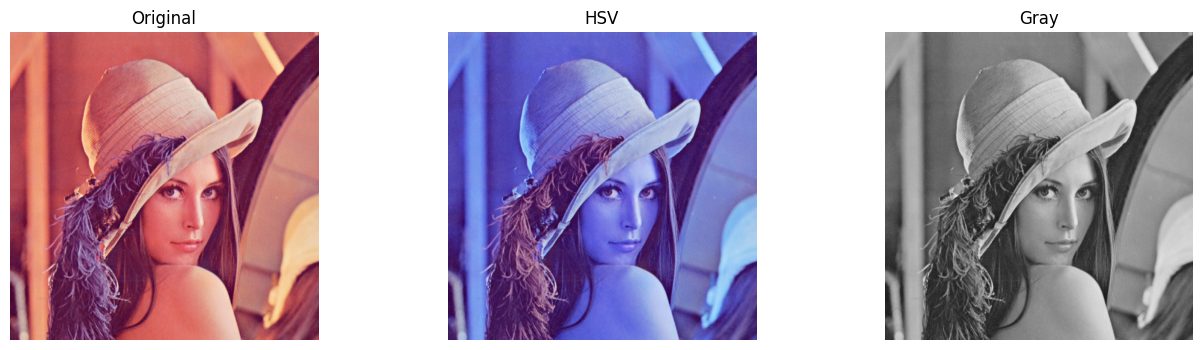

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].imshow(lena)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(cv2.imread('output/lena_hsv.jpg'))
ax[1].set_title('HSV')
ax[1].axis('off')

ax[2].imshow(cv2.imread('output/lena_gray.jpg'))
ax[2].set_title('Gray')
ax[2].axis('off')

### Rehaussement du contraste :

Transformation par etirement d'histogramme:

7. Tracer L'histogramme d'une image couleur. Prenez par exemple l'image '**autumn.tif**'.  

L'histogramme associé a l'image dont l'exposition est relativement bonne presente une repartition des Pixels sur tout I'llltervalle Ainsi, pour corriger les défauts liés å l'exposltion d'une image, il suffit simplement d'étirer **son histogramme** : l'objectif est d'étendre les valeurs des niveaux de gris de l'image mal exposée, majoritairement répartis dans un sous intervalle [Imin, Imax] $\in$ [0,255], a tout l'lntervalle disponible.  


Text(0.5, 1.0, 'Blue')

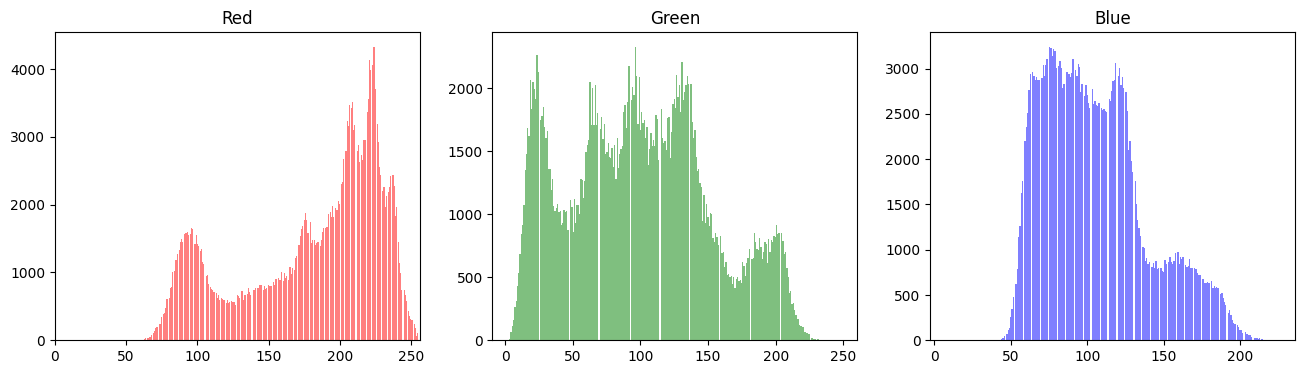

In [28]:
# visualisation de l'histogramme
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].hist(lena[:, :, 0].ravel(), bins=256, color='r', alpha=0.5)
ax[0].set_title('Red')
ax[0].set_xlim(0, 256)

ax[1].hist(lena[:, :, 1].ravel(), bins=256, color='g', alpha=0.5)
ax[1].set_title('Green')

ax[2].hist(lena[:, :, 2].ravel(), bins=256, color='b', alpha=0.5)
ax[2].set_title('Blue')


Cette transformation se fait linéairement ou non-linéairement. Dans le cas simple linéaire, la valeur
de chaque pixel est remplacée par le resultat de la formule ci-dessous.

$I'(x,y)=255*\frac{I(x,y)-Imin}{Imax-Imin}$

8. Realiser une fonction permettant un etirement d'histogramme par une transformation lineare (utilisation de LUT par exemple)


In [29]:
def stretch_histogram(channel):
    # find the minimum and maximum pixel values
    min_val = channel.min()
    max_val = channel.max()
    
    # stretch the histogram
    channel_stretched = (channel - min_val) * (255 / (max_val - min_val))
    
    return channel_stretched

affichage des histogramme

In [30]:
def show_image_hist(img):

    img_stretched = stretch_histogram(img)
    img_equalised = cv2.equalizeHist(img)

    _, ax = plt.subplots(1, 3, figsize=(16, 4))

    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original')

    ax[1].imshow(img_stretched, cmap='gray')
    ax[1].set_title('Stretched')

    ax[2].imshow(img_equalised, cmap='gray')
    ax[2].set_title('Equalised')

    # visualisation de l'histogramme
    _, ax = plt.subplots(1, 3, figsize=(16, 4))

    ax[0].hist(img.ravel(), bins=256, color='k', alpha=0.5)
    ax[0].set_title('Original')
    ax[0].set_xlim(0, 256)

    ax[1].hist(img_stretched.ravel(), bins=256, color='k', alpha=0.5)
    ax[1].set_title('Stretched')
    ax[1].set_xlim(0, 256)

    ax[2].hist(img_equalised.ravel(), bins=256, color='k', alpha=0.5)
    ax[2].set_title('Equalised')
    ax[2].set_xlim(0, 256)


9. Appliquer cette fonction sur les images en niveaux de gris 'cameraman.tif' et 'pout.tif' et afficher pour chaque cas les images originale améliorée.

Egalisation d'histogramme

10. Realiser unse egalisation d'histogramme sur les meme images que precedemment, puis afficher ces 2 images et leur histogramme en niveaux de gris sur la meme figure.  
Comparer le contraste de l'image avant et apres equalisation en calculant le contrast comme l'ecart type de l'image

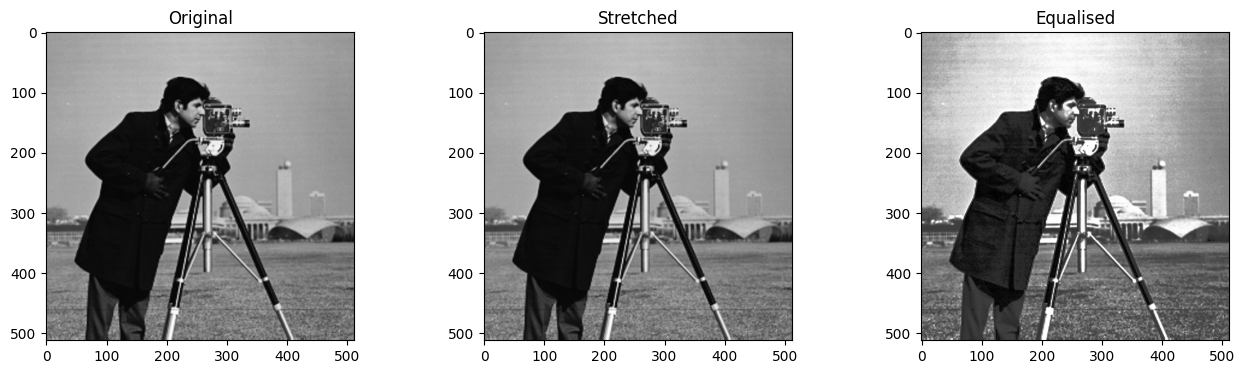

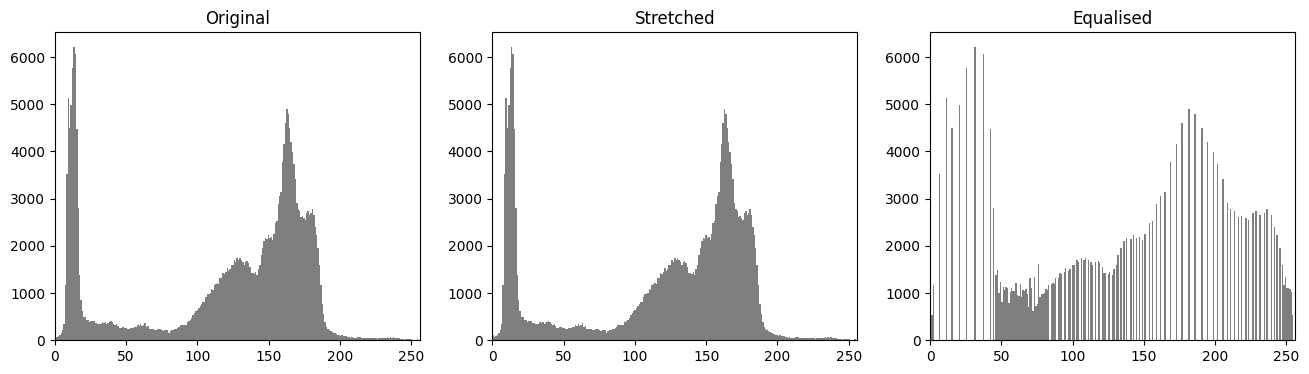

In [31]:
cameraman = cv2.cvtColor(cameraman, cv2.COLOR_BGR2GRAY)
show_image_hist(cameraman)

meme chose pour l'image pout

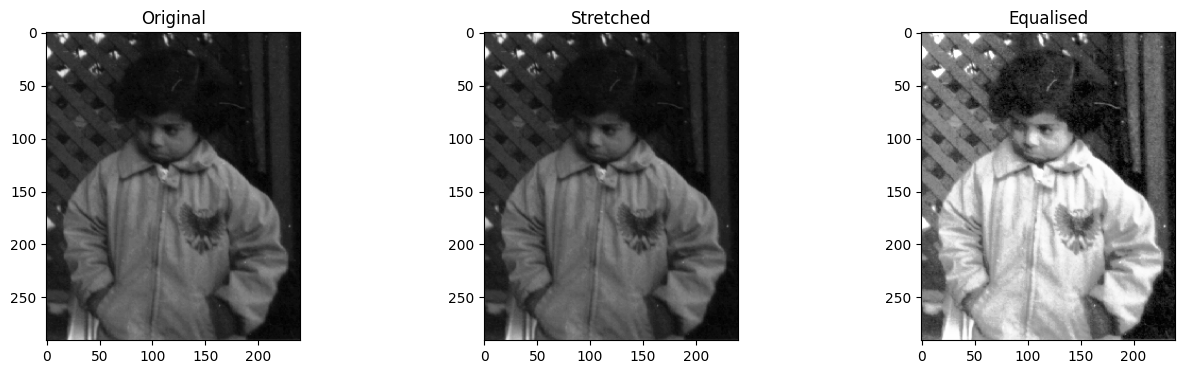

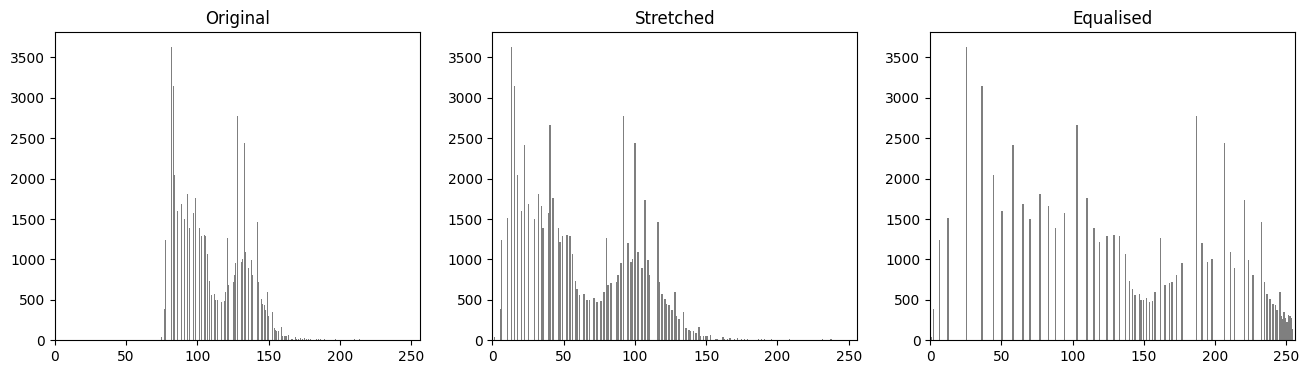

In [33]:
pout = cv2.imread('images/pout.tif')
pout = cv2.cvtColor(pout, cv2.COLOR_BGR2GRAY)
show_image_hist(pout)

In [60]:
def displayTwoImages(image1,image2,image3,image4,label3,label4):
    # image 1 gussian noise
    # image 2 salt and pepper noise
    # image 3 some filter on image 1
    # image 4 some filter on image 2
    # Display the original and filtered images (in one row)
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    
    ax[0].imshow(image1, cmap='gray')
    ax[0].set_title('Gaussian Noise')
    ax[0].axis('off')
    
    ax[2].imshow(image2, cmap='gray')
    ax[2].set_title('Salt and Pepper Noise')
    ax[2].axis('off')
    
    ax[1].imshow(image3, cmap='gray')
    ax[1].set_title(label3)
    ax[1].axis('off')
    
    ax[3].imshow(image4, cmap='gray')
    ax[3].set_title(label4)
    ax[3].axis('off')
    
    
    
def mean_squared_error(image1, image2):
    # Calculate the squared difference between the two images
    squared_diff = (image1 - image2) ** 2
    
    # Calculate the mean of the squared differences
    mse = np.mean(squared_diff)
    
    return mse

11 - ajouter un bruit gaussien à une image en niveaux de gris et en couleur.
Pour cela, on pourra utiliser la fonction randn de numpy pour générer une matrice de bruit gaussien, puis l'ajouter à l'image. On pourra utiliser la fonction cv2.add pour ajouter le bruit à l'image. Afficher l'image originale et l'image bruitée.
utuliser les images cameraman.tif et mand


(-0.5, 511.5, 511.5, -0.5)

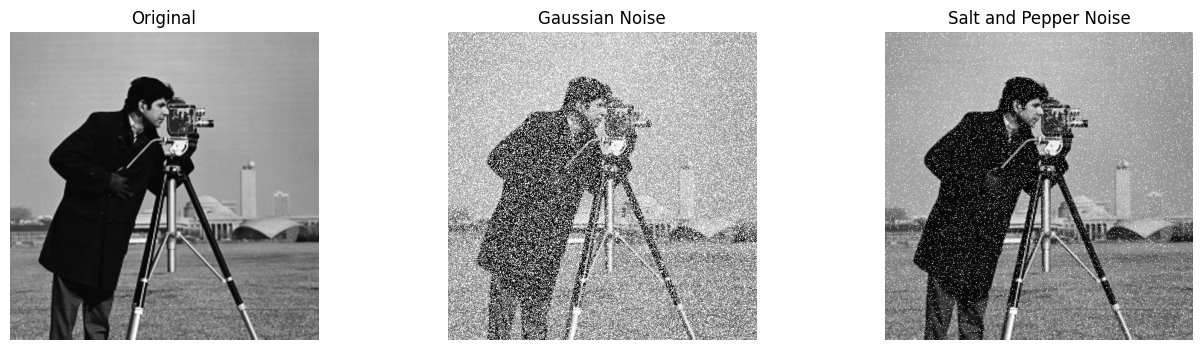

In [55]:
# Load the grayscale image
image_path = "./images/cameraman.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Generate Gaussian noise
gaussian_noise = np.random.randn(image.shape[0], image.shape[1]) * 2

# Generate salt and pepper noise
salt_pepper_noise = np.random.choice([0, 255], size=image.shape, p=[0.95, 0.05])  # Fix: Adjusted the probabilities to sum up to 1

# Add noise to the image
noisy_image_gaussian = cv2.add(image, gaussian_noise.astype(np.uint8))
noisy_image_salt_pepper = cv2.add(image, salt_pepper_noise.astype(np.uint8))

# Display the original and noisy images

fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(noisy_image_gaussian, cmap='gray')
ax[1].set_title('Gaussian Noise')
ax[1].axis('off')

ax[2].imshow(noisy_image_salt_pepper, cmap='gray')
ax[2].set_title('Salt and Pepper Noise')
ax[2].axis('off')




12 - A partire de l'image ansi bruitée. Appliquez différents filtres pour la restaurer. Vous pouvez utiliser par exemple...

- le filtre moyenneur
- le filtre gaussien
- le filtre médian


### Mean filter


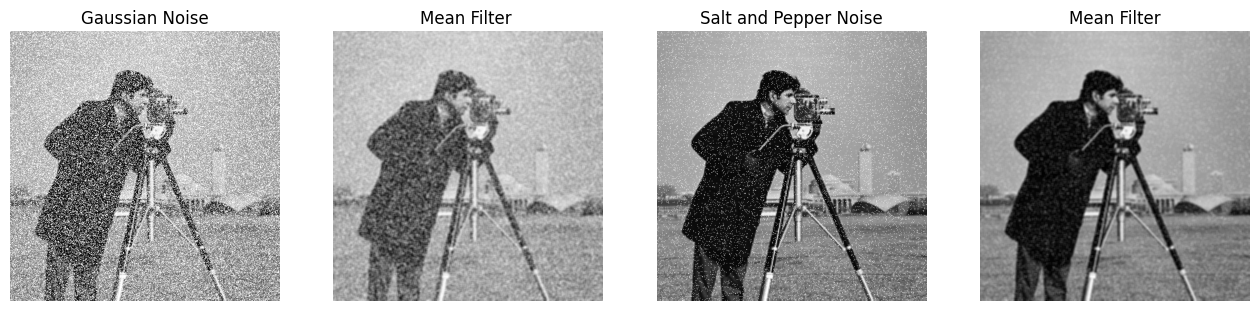

In [62]:
# filter moyenneur
def mean_filter(image, kernel_size):
    # Create a kernel with ones and divide each element by the kernel size
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    
    # Apply the kernel to the image using convolution
    filtered_image = cv2.filter2D(image, -1, kernel)
    
    return filtered_image

# apply the mean filter
filtered_image_gaussian = mean_filter(noisy_image_gaussian, 5)
filtered_image_salt_pepper = mean_filter(noisy_image_salt_pepper, 5)
    
displayTwoImages(noisy_image_gaussian,noisy_image_salt_pepper,filtered_image_gaussian,filtered_image_salt_pepper,"Mean Filter ","Mean Filter")

In [48]:
# calcule MSE
mse_gaussian_mean = mean_squared_error(image, filtered_image_gaussian)

print(f"The Mean Squared Error (MSE) is: {mse_gaussian_mean}")

mse_salt_pepper_mean = mean_squared_error(image, filtered_image_salt_pepper)

print(f"The Mean Squared Error (MSE) is: {mse_salt_pepper_mean}")


The Mean Squared Error (MSE) is: 114.85124206542969
The Mean Squared Error (MSE) is: 57.32221984863281


### Median filter


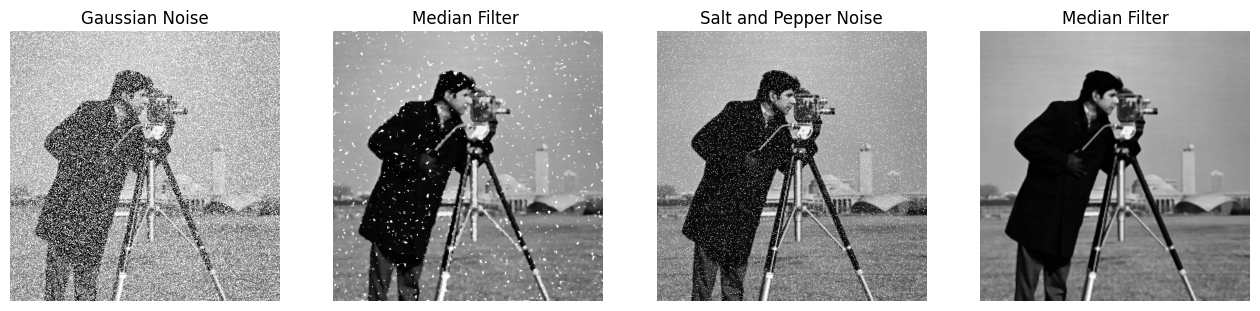

In [63]:
# filter median
def median_filter(image, kernel_size):
    # Apply the median filter to the image
    filtered_image = cv2.medianBlur(image, kernel_size)
    
    return filtered_image

# apply the median filter
filtered_image_gaussian = median_filter(noisy_image_gaussian, 5)
filtered_image_salt_pepper = median_filter(noisy_image_salt_pepper, 5)

displayTwoImages(noisy_image_gaussian,noisy_image_salt_pepper,filtered_image_gaussian,filtered_image_salt_pepper,"Median Filter ","Median Filter")


In [50]:
# calcule MSE
mse_gaussian_median = mean_squared_error(image, filtered_image_gaussian)

print(f"The Mean Squared Error (MSE) is: {mse_gaussian_median}")

mse_salt_pepper_median = mean_squared_error(image, filtered_image_salt_pepper)

print(f"The Mean Squared Error (MSE) is: {mse_salt_pepper_median}")

The Mean Squared Error (MSE) is: 33.352108001708984
The Mean Squared Error (MSE) is: 17.000320434570312


### Gaussian filter


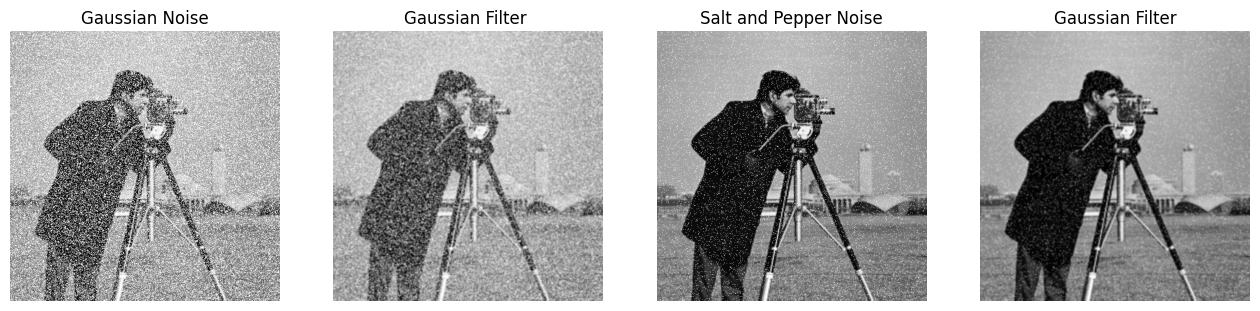

In [64]:
# filter gaussien
def gaussian_filter(image, kernel_size, sigma):
    # Apply the Gaussian filter to the image
    filtered_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
    return filtered_image

# apply the gaussian filter
filtered_image_gaussian = gaussian_filter(noisy_image_gaussian, 5, 1)
filtered_image_salt_pepper = gaussian_filter(noisy_image_salt_pepper, 5, 1)

displayTwoImages(noisy_image_gaussian,noisy_image_salt_pepper,filtered_image_gaussian,filtered_image_salt_pepper,"Gaussian Filter ","Gaussian Filter")


In [44]:
# MSE
mse_gaussian_gaussian = mean_squared_error(image, filtered_image_gaussian)

print(f"The Mean Squared Error (MSE) is: {mse_gaussian_gaussian}")

mse_salt_pepper_gaussian = mean_squared_error(image, filtered_image_salt_pepper)

print(f"The Mean Squared Error (MSE) is: {mse_salt_pepper_gaussian}")


The Mean Squared Error (MSE) is: 113.85135269165039
The Mean Squared Error (MSE) is: 46.94010925292969


### Interpreting the results


In [45]:
# print all result in a table
print("MSE for different filters")
print("Filter\t\t\t\tGaussian Noise\t\t\tSalt and Pepper Noise")
print("Mean Filter    \t\t\t", mse_gaussian_mean, "\t\t", mse_salt_pepper_mean)
print("Median Filter  \t\t\t", mse_gaussian_median, "\t\t", mse_salt_pepper_median)
print("Gaussian Filter\t\t\t", mse_gaussian_gaussian, "\t\t", mse_salt_pepper_gaussian)


MSE for different filters
Filter				Gaussian Noise			Salt and Pepper Noise
Mean Filter    			 114.85124206542969 		 57.32221984863281
Median Filter  			 33.352108001708984 		 17.000320434570312
Gaussian Filter			 113.85135269165039 		 46.94010925292969


Qu'est-ce qui constitue le bruit de chaque image ?

Parmi les trois filtres, quel est le filtre le plus adapté pour la correction ?

Expliquez pourquoi.


- 1

  - Le bruit gaussien est un bruit aléatoire qui suit une distribution gaussienne. Il ajoute une sorte de flou à l'image et peut être modélisé comme une variation aléatoire de l'intensité des pixels.

  - Le bruit de sel et de poivre est un bruit aléatoire qui ajoute des pixels noirs et blancs aléatoires à l'image. Il simule des pixels corrompus ou manquants dans l'image.

- 2
  - Le filtre médian est généralement le plus adapté pour la correction du bruit de sel et de poivre. Il fonctionne en remplaçant chaque pixel par la médiane des pixels voisins dans une fenêtre donnée. Cela permet de supprimer efficacement les pixels bruités sans affecter les contours et les détails de l'image.


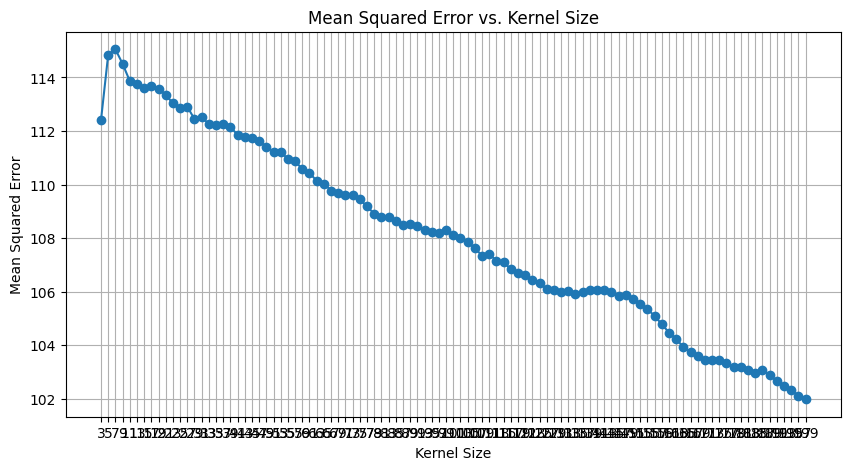

In [46]:
# Define the kernel sizes
kernel_sizes = [i for i in range(3, 200, 2)]

# Initialize the list to store the mse values
mse_values = []

# Apply the Mean filter with different kernel sizes
for kernel_size in kernel_sizes:
    # Apply the Mean filter
    filtered_image = mean_filter(noisy_image_gaussian, kernel_size)
    
    # Calculate the mean squared error
    mse = mean_squared_error(image, filtered_image)
    
    # Append the mse value to the list
    mse_values.append(mse)

# Plot the mse values as a curve
plt.figure(figsize=(10, 5))
plt.plot(kernel_sizes, mse_values, '-o')
plt.title('Mean Squared Error vs. Kernel Size')
plt.xlabel('Kernel Size')
plt.ylabel('Mean Squared Error')
plt.xticks(kernel_sizes)
plt.grid()
plt.show()




#### Filtrage passe haut / passe bas


- passe bas

Text(0.5, 1.0, 'Moyenneur 7x7')

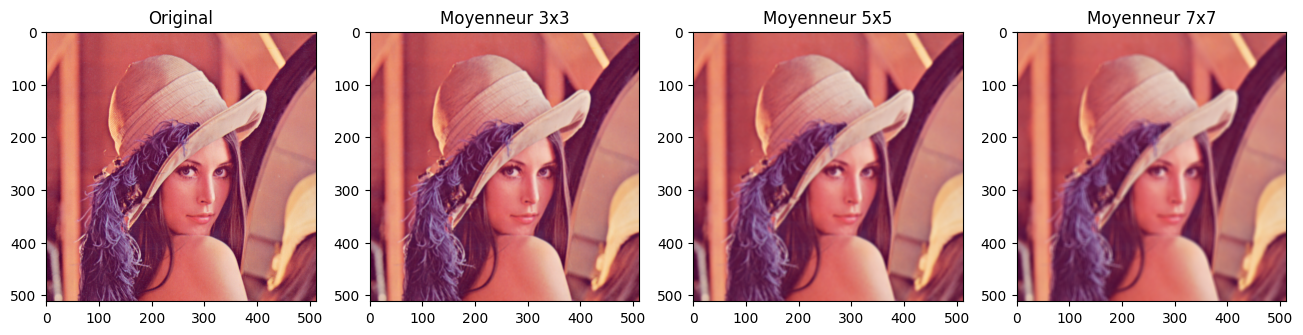

In [67]:
lena_moyenneur_3 = mean_filter(lena, 3)
lena_moyenneur_5 = mean_filter(lena, 5)
lena_moyenneur_7 = mean_filter(lena, 7)

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(lena)
ax[0].set_title('Original')

ax[1].imshow(lena_moyenneur_3)
ax[1].set_title('Moyenneur 3x3')

ax[2].imshow(lena_moyenneur_5)
ax[2].set_title('Moyenneur 5x5')

ax[3].imshow(lena_moyenneur_7)
ax[3].set_title('Moyenneur 7x7')


Text(0.5, 1.0, 'Median 7x7')

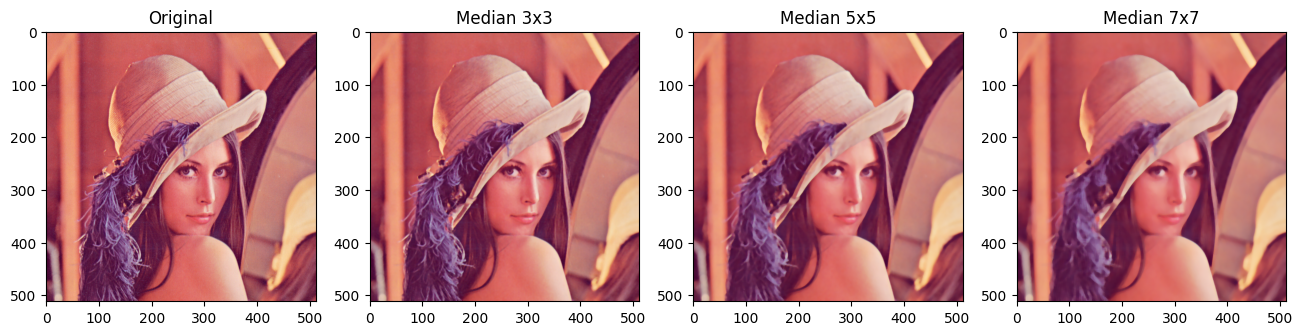

In [68]:
lena_median_3 = median_filter(lena, 3)
lena_median_5 = median_filter(lena, 5)
lena_median_7 = median_filter(lena, 7)

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(lena)
ax[0].set_title('Original')

ax[1].imshow(lena_median_3)
ax[1].set_title('Median 3x3')

ax[2].imshow(lena_median_5)
ax[2].set_title('Median 5x5')

ax[3].imshow(lena_median_7)
ax[3].set_title('Median 7x7')

les filtre passe bas en general on un effet de flouter l'image  
le filtre moyenneur enleve le bruit guassien  
le filtre median permet de supprimer le bruit impulsionnel (salt and pepper noise)

- passe haut

Text(0.5, 1.0, 'filtre H_1')

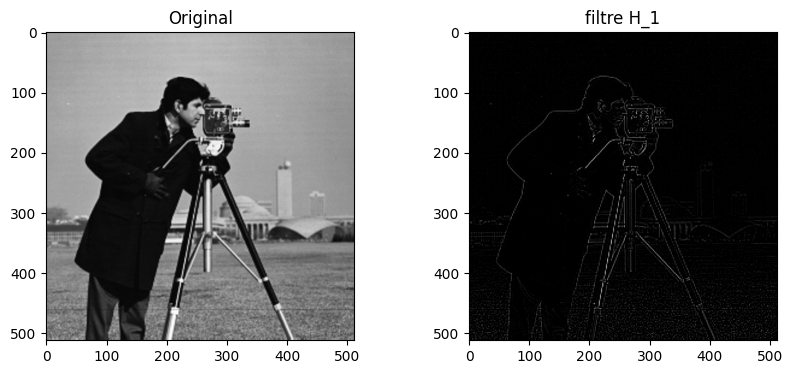

In [69]:
H_1 = (1/9) * np.array([[ 0, -1, 0],[-1,4,-1],[0,-1,0]])
cameraman_h_1 = cv2.filter2D(cameraman, -1, H_1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(cameraman, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(cameraman_h_1, cmap='gray')
ax[1].set_title('filtre H_1')

Text(0.5, 1.0, 'filtre H_2')

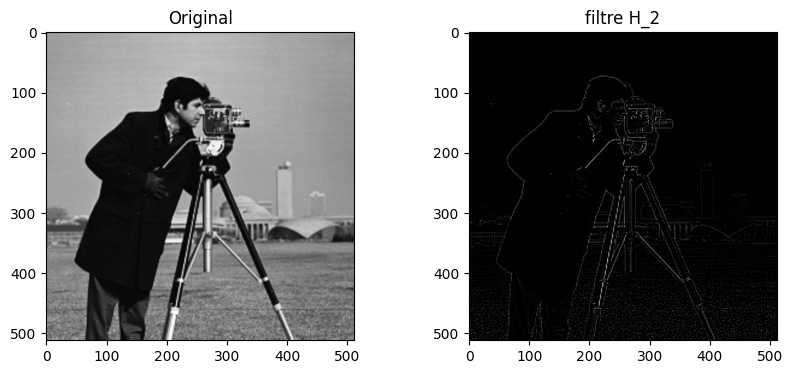

In [70]:
H_2 = (1/9) * np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
cameraman_h_2 = cv2.filter2D(cameraman, -1, H_2)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow(cameraman, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(cameraman_h_2, cmap='gray')
ax[1].set_title('filtre H_2')


Les filtre haut sont utilisé pour detecter les contours qui sont des changements brusques de l'intensité des pixels  

On peut utiliser ces filtres pour la detection de objet dans une image